# Random Number Generation

Random number generation is fundamental to machine learning and computational neuroscience. **BrainState** provides a comprehensive random number generation system built on JAX that combines:

- 🎲 **NumPy-like API**: Familiar interface for easy adoption
- 🔐 **Reproducibility**: Deterministic pseudorandom sequences
- ⚡ **High Performance**: JIT-compiled random functions
- 🔄 **Stateful Management**: Automatic key splitting and state handling

By the end of this tutorial, you will understand:

- How to generate random numbers with BrainState
- The `RandomState` class and seed management
- Available probability distributions
- Random sampling and shuffling operations
- Best practices for reproducible experiments

In [1]:
import brainstate
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

## Why BrainState Random?

### JAX's Challenge

JAX uses **explicit random keys** for reproducibility and parallelization:

```python
# JAX approach - manual key management
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)  # Must split manually
x = jax.random.normal(subkey, (100,))
```

This is powerful but verbose. **BrainState** simplifies this:

```python
# BrainState approach - automatic key management
brainstate.random.seed(0)
x = brainstate.random.normal(0, 1, (100,))  # Keys handled automatically
```

### Key Features

✅ **Automatic key splitting**: No manual key management  
✅ **NumPy compatibility**: Drop-in replacement for `numpy.random`  
✅ **Stateful interface**: Natural imperative programming style  
✅ **JIT compatible**: Full performance with JAX transformations  

## API Overview

The `brainstate.random` module provides a wide range of functions for random number generation and sampling from probability distributions.

| Category | API Functions |
|----------|---------------|
| **Random Sampling** | `rand`, `randn`, `randint`, `random`, `choice` |
| **Continuous Distributions** | `normal`, `uniform`, `beta`, `gamma`, `exponential`, `gumbel`, `laplace`, `logistic` |
| **Discrete Distributions** | `binomial`, `poisson`, `bernoulli`, `categorical` |
| **Shuffling** | `shuffle`, `permutation` |
| **Seed Management** | `seed`, `get_key`, `set_key`, `split_key` |
| **State Management** | `RandomState`, `DEFAULT` |

### The DEFAULT RandomState

All random functions in `brainstate.random` use a global `DEFAULT` instance of `RandomState`:

In [2]:
# The DEFAULT random state
print("Default RandomState:")
print(brainstate.random.DEFAULT)
print(f"\nType: {type(brainstate.random.DEFAULT)}")

Default RandomState:
RandomState([7586 8057])

Type: <class 'brainstate.random._state.RandomState'>


## Seed Management and Reproducibility

### Setting Seeds

For reproducible experiments, always set a seed at the beginning:

In [3]:
# Set seed for reproducibility
brainstate.random.seed(42)
print("Seed set to 42")

# Generate some numbers
x1 = brainstate.random.rand(5)
print(f"First sequence: {x1}")

# Reset to same seed
brainstate.random.seed(42)
x2 = brainstate.random.rand(5)
print(f"Second sequence: {x2}")
print(f"\nIdentical? {jnp.allclose(x1, x2)}")

Seed set to 42
First sequence: [0.72766423 0.78786755 0.18169427 0.26263022 0.11072934]
Second sequence: [0.72766423 0.78786755 0.18169427 0.26263022 0.11072934]

Identical? True


### Advanced: Key Management

For advanced use cases, you can directly access and manipulate keys:

In [4]:
# Get current key
current_key = brainstate.random.get_key()
print(f"Current key: {current_key}")

# Split key for parallel operations
keys = brainstate.random.split_key(n=4)
print(f"\nSplit into {len(keys)} keys:")
for i, key in enumerate(keys):
    print(f"  Key {i}: {key}")

Current key: [1832780943  270669613]

Split into 4 keys:
  Key 0: [1705926158  899080142]
  Key 1: [4095997477  317277840]
  Key 2: [1820970612 3729538270]
  Key 3: [3985668294 1940518238]


In [5]:
# Save and restore state
saved_key = brainstate.random.get_key()
v1 = brainstate.random.randn(3)

# Generate more numbers
v2 = brainstate.random.randn(3)

# Restore state
brainstate.random.set_key(saved_key)
v3 = brainstate.random.randn(3)

print(f"v1: {v1}")
print(f"v2: {v2}")
print(f"v3 (restored): {v3}")
print(f"\nv1 == v3? {jnp.allclose(v1, v3)}")

v1: [-0.39489815 -0.42596528 -1.0719717 ]
v2: [ 0.6733885  -0.50893074 -0.28400496]
v3 (restored): [-0.39489815 -0.42596528 -1.0719717 ]

v1 == v3? True


## Random Sampling

### Basic Sampling Functions

In [6]:
# Uniform [0, 1)
brainstate.random.seed(42)
uniform_samples = brainstate.random.rand(5)
print("Uniform [0,1) samples:", uniform_samples)

Uniform [0,1) samples: [0.72766423 0.78786755 0.18169427 0.26263022 0.11072934]


In [7]:
# Standard normal (mean=0, std=1)
normal_samples = brainstate.random.randn(5)
print("Standard normal samples:", normal_samples)

Standard normal samples: [-0.21089035 -1.3627948  -0.04500385 -1.1536394   1.9141139 ]


In [8]:
# Random integers
int_samples = brainstate.random.randint(0, 10, size=5)
print("Random integers [0,10):", int_samples)

Random integers [0,10): [0 2 0 0 8]


### Choice and Permutation

In [9]:
# Random choice from array
options = jnp.array([10, 20, 30, 40, 50])
choices = brainstate.random.choice(options, size=3, replace=False)
print(f"Random choices from {options}:")
print(choices)

Random choices from [10 20 30 40 50]:
[40 50 20]


In [10]:
# Shuffle array
array = jnp.arange(10)
shuffled = brainstate.random.shuffle(array)
print(f"Original: {array}")
print(f"Shuffled: {shuffled}")

Original: [0 1 2 3 4 5 6 7 8 9]
Shuffled: [7 4 8 2 5 6 3 0 1 9]


In [11]:
# Random permutation
perm = brainstate.random.permutation(10)
print(f"Random permutation of 0-9: {perm}")

Random permutation of 0-9: [2 6 9 7 4 3 1 0 5 8]


## Probability Distributions

### Continuous Distributions

In [12]:
# Normal distribution
brainstate.random.seed(0)
normal_samples = brainstate.random.normal(loc=5.0, scale=2.0, size=1000)
print(f"Normal(μ=5, σ=2):")
print(f"  Mean: {jnp.mean(normal_samples):.3f} (expected: 5.0)")
print(f"  Std:  {jnp.std(normal_samples):.3f} (expected: 2.0)")

Normal(μ=5, σ=2):
  Mean: 4.941 (expected: 5.0)
  Std:  2.099 (expected: 2.0)


In [13]:
# Uniform distribution
uniform_samples = brainstate.random.uniform(low=0, high=10, size=1000)
print(f"\nUniform[0, 10):")
print(f"  Mean: {jnp.mean(uniform_samples):.3f} (expected: 5.0)")
print(f"  Min:  {jnp.min(uniform_samples):.3f}")
print(f"  Max:  {jnp.max(uniform_samples):.3f}")


Uniform[0, 10):
  Mean: 5.071 (expected: 5.0)
  Min:  0.012
  Max:  9.953


In [14]:
# Exponential distribution
exp_samples = brainstate.random.exponential(scale=2.0, size=1000)
print(f"\nExponential(λ=0.5):")
print(f"  Mean: {jnp.mean(exp_samples):.3f} (expected: 2.0)")

# Beta distribution
beta_samples = brainstate.random.beta(a=2.0, b=5.0, size=1000)
print(f"\nBeta(α=2, β=5):")
print(f"  Mean: {jnp.mean(beta_samples):.3f} (expected: {2/(2+5):.3f})")


Exponential(λ=0.5):
  Mean: 0.505 (expected: 2.0)

Beta(α=2, β=5):
  Mean: 0.292 (expected: 0.286)


### Discrete Distributions

In [15]:
# Binomial distribution
binomial_samples = brainstate.random.binomial(n=10, p=0.5, size=1000)
print(f"Binomial(n=10, p=0.5):")
print(f"  Mean: {jnp.mean(binomial_samples):.3f} (expected: 5.0)")
print(f"  Std:  {jnp.std(binomial_samples):.3f} (expected: {jnp.sqrt(10*0.5*0.5):.3f})")

Binomial(n=10, p=0.5):
  Mean: 5.024 (expected: 5.0)
  Std:  1.588 (expected: 1.581)


In [16]:
# Poisson distribution
poisson_samples = brainstate.random.poisson(lam=3.0, size=1000)
print(f"\nPoisson(λ=3):")
print(f"  Mean: {jnp.mean(poisson_samples):.3f} (expected: 3.0)")
print(f"  Var:  {jnp.var(poisson_samples):.3f} (expected: 3.0)")


Poisson(λ=3):
  Mean: 2.979 (expected: 3.0)
  Var:  2.949 (expected: 3.0)


### Visualizing Distributions

Let's visualize several distributions:

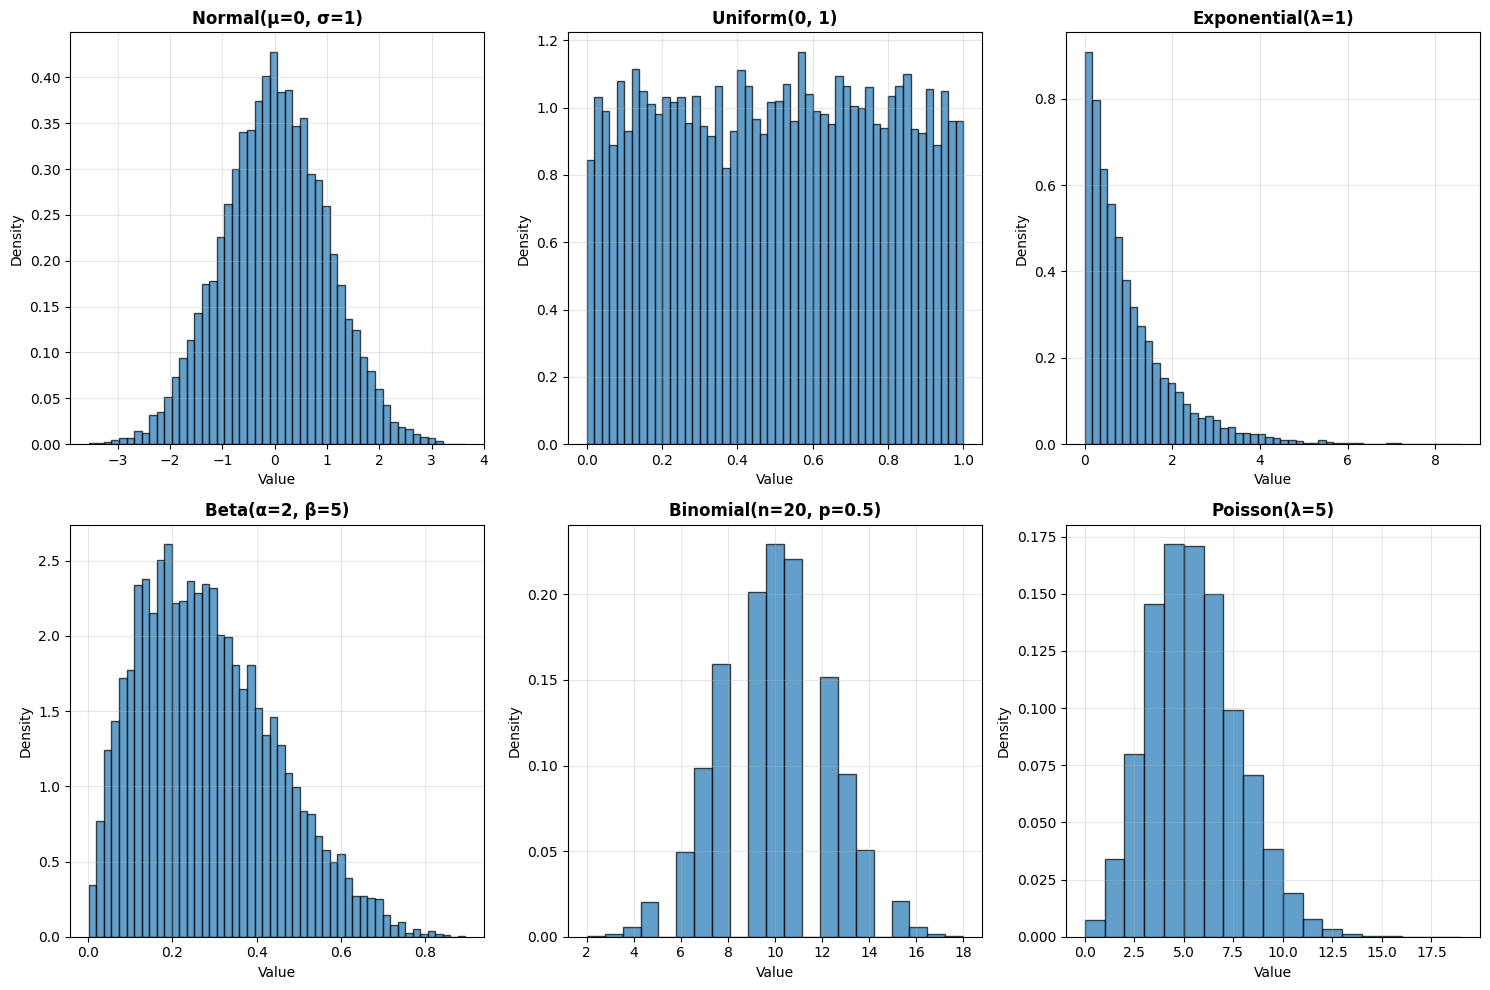

In [17]:
brainstate.random.seed(42)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Normal
samples = brainstate.random.normal(0, 1, 10000)
axes[0, 0].hist(np.array(samples), bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Normal(μ=0, σ=1)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].grid(alpha=0.3)

# Uniform
samples = brainstate.random.uniform(0, 1, 10000)
axes[0, 1].hist(np.array(samples), bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Uniform(0, 1)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Density')
axes[0, 1].grid(alpha=0.3)

# Exponential
samples = brainstate.random.exponential(1.0, 10000)
axes[0, 2].hist(np.array(samples), bins=50, density=True, alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Exponential(λ=1)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Density')
axes[0, 2].grid(alpha=0.3)

# Beta
samples = brainstate.random.beta(2, 5, 10000)
axes[1, 0].hist(np.array(samples), bins=50, density=True, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Beta(α=2, β=5)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Density')
axes[1, 0].grid(alpha=0.3)

# Binomial
samples = brainstate.random.binomial(20, 0.5, 10000)
axes[1, 1].hist(np.array(samples), bins=21, density=True, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Binomial(n=20, p=0.5)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Density')
axes[1, 1].grid(alpha=0.3)

# Poisson
samples = brainstate.random.poisson(5, 10000)
axes[1, 2].hist(np.array(samples), bins=range(0, 20), density=True, alpha=0.7, edgecolor='black')
axes[1, 2].set_title('Poisson(λ=5)', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Density')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Custom RandomState Instances

For advanced use cases, you can create custom `RandomState` instances with independent random streams:

In [18]:
# Create custom random generators
rng1 = brainstate.random.RandomState(42)
rng2 = brainstate.random.RandomState(123)

print("RNG 1:")
print(rng1)

RNG 1:
RandomState([ 0 42])


In [19]:
# Generate independent random sequences
samples1 = rng1.randn(5)
samples2 = rng2.randn(5)

print(f"Samples from RNG1: {samples1}")
print(f"Samples from RNG2: {samples2}")
print(f"\nAre they different? {not jnp.allclose(samples1, samples2)}")

Samples from RNG1: [ 0.60576403  0.7990441  -0.908927   -0.63525754 -1.2226585 ]
Samples from RNG2: [-0.7828054  -1.5373377  -0.5513038  -0.02385257  1.164293  ]

Are they different? True


In [20]:
# Re-seed custom RNG
rng1.seed(999)
samples3 = rng1.randn(5)
print(f"\nAfter re-seeding RNG1 to 999: {samples3}")


After re-seeding RNG1 to 999: [ 0.8200472  -0.35510033 -1.2458946  -0.33925015 -0.7285477 ]


## Practical Examples

### Example 1: Mini-Batch Sampling

In [21]:
def create_mini_batches(X, y, batch_size=32, shuffle=True):
    """Create mini-batches for training."""
    n_samples = len(X)
    
    # Shuffle indices
    if shuffle:
        indices = brainstate.random.permutation(n_samples)
    else:
        indices = jnp.arange(n_samples)
    
    # Create batches
    batches = []
    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        batches.append((X[batch_indices], y[batch_indices]))
    
    return batches

# Generate dummy dataset
brainstate.random.seed(0)
X = brainstate.random.randn(100, 10)  # 100 samples, 10 features
y = brainstate.random.randint(0, 2, 100)  # Binary labels

# Create mini-batches
batches = create_mini_batches(X, y, batch_size=32)
print(f"Created {len(batches)} mini-batches")
print(f"First batch shape: X={batches[0][0].shape}, y={batches[0][1].shape}")

Created 4 mini-batches
First batch shape: X=(32, 10), y=(32,)


### Example 2: Dropout Layer

In [22]:
class Dropout(brainstate.nn.Module):
    """Dropout layer with random masking."""
    
    def __init__(self, drop_rate=0.5):
        super().__init__()
        self.drop_rate = drop_rate

    def __call__(self, x):
        fit = brainstate.environ.get('fit', False)
        if not fit:
            return x
        
        # Generate random mask
        keep_prob = 1.0 - self.drop_rate
        mask = brainstate.random.bernoulli(keep_prob, x.shape)
        
        # Apply dropout and scale
        return x * mask / keep_prob

# Test dropout
brainstate.random.seed(42)
dropout = Dropout(drop_rate=0.3)

x = jnp.ones(10)
y = dropout(x)

print(f"Input:  {x}")
print(f"Output: {y}")
print(f"Zeros:  {jnp.sum(y == 0)}/10")

Input:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Output: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Zeros:  0/10


### Example 3: Noisy Neural Network

In [23]:
class NoisyLayer(brainstate.nn.Module):
    """Linear layer with Gaussian noise."""
    
    def __init__(self, d_in, d_out, noise_std=0.1):
        super().__init__()
        self.noise_std = noise_std
        
        # Parameters with noise
        self.w = brainstate.ParamState(brainstate.random.randn(d_in, d_out) * 0.1)
        self.b = brainstate.ParamState(jnp.zeros(d_out))
    
    def __call__(self, x):
        # Add weight noise
        w_noisy = self.w.value + brainstate.random.normal(0, self.noise_std, self.w.value.shape)
        
        # Forward pass
        return x @ w_noisy + self.b.value

# Create and test
brainstate.random.seed(0)
layer = NoisyLayer(5, 3, noise_std=0.01)

x = jnp.ones(5)
y1 = layer(x)
y2 = layer(x)  # Different due to noise

print(f"Output 1: {y1}")
print(f"Output 2: {y2}")
print(f"Difference: {y2 - y1}")

Output 1: [-0.29487485 -0.37535232 -0.19899406]
Output 2: [-0.30561778 -0.33523202 -0.16594572]
Difference: [-0.01074293  0.0401203   0.03304833]


## Best Practices

### 1. Always Set Seeds for Reproducibility

```python
# At the start of your script/notebook
brainstate.random.seed(42)
```

### 2. Use Custom RNGs for Independent Streams

```python
# For data augmentation
aug_rng = brainstate.random.RandomState(seed=123)

# For model initialization  
init_rng = brainstate.random.RandomState(seed=456)
```

### 3. Save and Restore State for Checkpoints

```python
# Save state
checkpoint = {
    'model': model.state_dict(),
    'rng_key': brainstate.random.get_key()
}

# Restore state
brainstate.random.set_key(checkpoint['rng_key'])
```

## Summary

In this tutorial, you learned:

✅ **Seed management** for reproducible experiments  
✅ **Random sampling** with various distributions  
✅ **Custom RandomState** instances for independent streams  
✅ **Practical applications** in neural networks  
✅ **Best practices** for random number generation  

### Key Points

- 🎲 BrainState provides a NumPy-like interface to JAX's random system
- 🔐 Always set seeds for reproducibility
- ⚡ Random functions are JIT-compatible and high-performance
- 🔄 State is automatically managed for you

### Next Steps

Continue with:
- **Neural Network Modules** - Use random initialization in models
- **Program Transformations** - Combine randomness with JIT, vmap, and grad
- **Training Loops** - Implement stochastic gradient descent

### Additional Resources

- 📚 [JAX Random Documentation](https://jax.readthedocs.io/en/latest/jax.random.html)
- 🎲 [NumPy Random Documentation](https://numpy.org/doc/stable/reference/random/index.html)
- 🧠 [BrainState API Reference](https://brainstate.readthedocs.io/)